# On visualizing number fields #

In a group with Kate Stange, Ian Whitehead, Hanson Smith, Caleb Springer, and a few others, I explored a few different ways to visualize number fields. We are hoping to come up with something that would be appropriate as images for the LMFDB --- which currently doesn't have number field portraits.

In this note, I summarize some of the ideas that we discussed and give examples. This also includes implementations in sage. This note is also available as a jupyter notebook independently on [my website](https://davidlowryduda.com).

## Broad ideas and challenges ##

Two natural sets of objects to try to visualize are collections of points in the number field, or collections of points in the ring of integers associated to the number field.

- For the ring of integers, we might visualize
  * just the basis elements,
  * elements that are *small* combinations of basis elements, or
  * elements that are a *power integral basis*, i.e. elements $\alpha_i$ such that the ring of integers is given by the **ring** $\mathbb{Z}[\alpha_1, ..., \alpha_n]$. If the ring of integers is monogenic, then there is a single $\alpha_i$.
- For collections of points in the number field, we might visualize
  * all points of height up to some bound, or
  * random points.
  
There is a difference between a number field and embeddings of that number field into the complex numbers. Although number fields have various embeddings into two-dimensional complex space, it is often more natural to consider a degree $n$ number field as living in a natural degree $n$ space spanned by the lattice of the ring of integers.

The possible elements to visualize above are for subsets of elements of the number field. What do we do with the various embeddings?

In many of the visualizations below, we use color to distinguish between the varied embeddings, and plot the same sets of points in different embeddings.

Note that there are already sources of indeterminism:

1. Which basis does one choose for the ring of integers?
2. How does one order the embeddings?


## Characteristics of visualizations ##

Fundamentally, each visualization below are plots of sets of disks of certain sizes and colors. Thus for each visualization below, we specify 

- what disks are plotted,
- how we determine the sizes of each disk, and
- how we determine the color of each disk.

## Visualizing points of bounded height ##

Given a number field $F$, compute all points of height below some fixed bound $B$ (for some choice of height function). This is cannonical and independent of the chosen basis.

In this plot, we compute all embeddings $\{ \sigma_1, \ldots, \sigma_n \}$ and fix an ordering of them. (Here we use whatever ordering sage uses). For each point $z$ in the number field of height up to $B$ and for each embedding $\sigma_i$, we plot the point $\sigma_i(z)$ with size inversely proportional to the height of $z$, and with color ranging from red (for the first embedding) to blue (for the last embedding).

In [1]:
from sage.plot.colors import red, blue, white


def draw_fieldelts_bdd_height(F,bd):
    embs = F.embeddings(CC)
    pts = list(F.elements_of_bounded_height(bound=bd))
    vis = Graphics()
    for emb in embs:
        pts_emb = [emb(pt) for pt in pts]
        disk_sizer = lambda x : 0.02/(x.global_height())
        for index in range(len(pts_emb)):
            size = disk_sizer(pts[index])
            if size > 0.0001:
                vis += disk( (pts_emb[index].real(),pts_emb[index].imag()),
                             size, (0, 2*pi), alpha=1.0,
                             color=red.blend(blue, embs.index(emb)/len(embs))
                           )
    return vis

This sort of plot is particularly pleasant for quadratic imaginary number fields, where the lattice structure is completely visible.

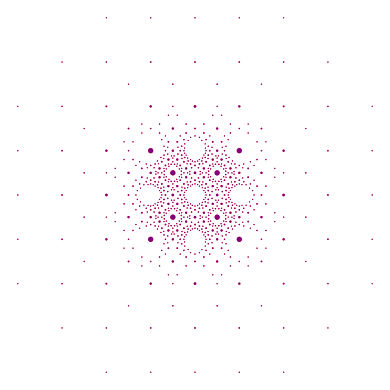

In [2]:
Fgauss.<a> = NumberField(x^2 + 1)
gauss = draw_fieldelts_bdd_height(Fgauss, 20)
gauss.show(axes=False)

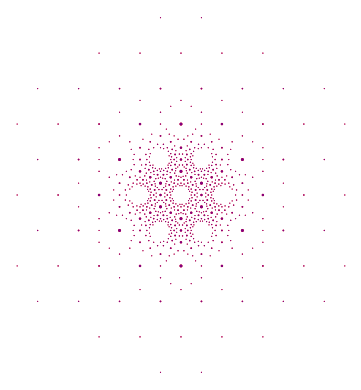

In [3]:
Feis.<a> = NumberField(x^2 + x + 1)
eis = draw_fieldelts_bdd_height(Feis, 20)
eis.show(axes=False)

These plots reveal that points of low height *repel* each other. These plots are a bit less satisfying for real quadratic fields.

/home/davidlowryduda/sagebuild/sage/local/var/lib/sage/venv-python3.8/lib/python3.8/site-packages/matplotlib/patches.py:1189: RuntimeWarning: invalid value encountered in multiply
  v *= self.r


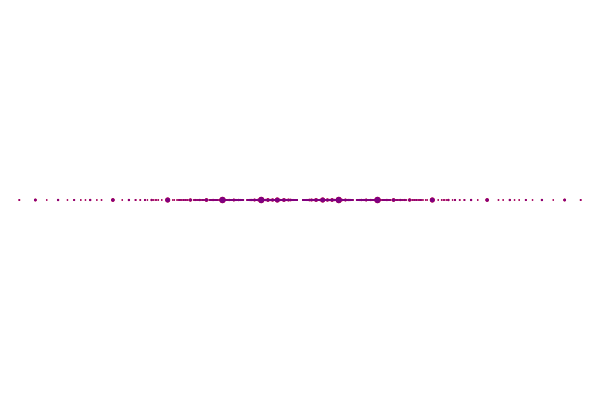

In [4]:
Frq.<a> = NumberField(x^2 - 2)
fig = draw_fieldelts_bdd_height(Frq, 20)
fig.set_axes_range(xmin=-5, xmax=5, ymin=-1, ymax=1) # it complains that ymin, ymax are both 0 otherwise.
fig.show(axes=False, fig_tight=False)                # similarly, with fig_tight it has no height.

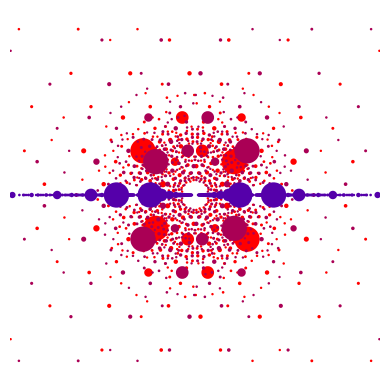

In [5]:
Fd3.<a> = NumberField(x^3 - x^2 + 2*x - 1)
fig = draw_fieldelts_bdd_height(Fd3, 20)
fig.set_axes_range(xmin=-3, xmax=3, ymin=-3, ymax=3)
fig.show(axes=False)

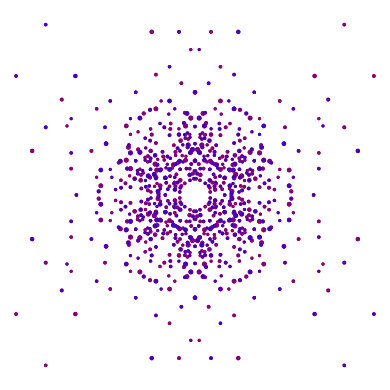

In [6]:
Fd4.<a> = NumberField(x^4 + 7*x^2 + 13)
fig = draw_fieldelts_bdd_height(Fd4, 20)
fig.set_axes_range(xmin=-3, xmax=3, ymin=-3, ymax=3)
fig.show(axes=False)

For higher degrees, it would probably be necessary to reduce the height bound. But in fact sage uses a sophisticated algorithm to generate points of bounded height, which requires computing the class number of the field. We haven't looked into an alternative, but this prevents us from currently producing high degree visualizations.

We noticed that overlaying different embeddings is confusing. Each individual embedding is natural, but overlaying them obscures the underlying lattice structure. One way around this is to fix an embedding and plotting it. To add some color, we color the point $z$ from red to blue based on the real part of *a different fixed embedding* of $z$.

In [7]:
def draw_fieldelts_one_embed(F, bd):
    embs = F.embeddings(CC)
    emb = embs[-1]
    emb2 = embs[0]
    pts = list(F.elements_of_bounded_height(bound=bd))
    pts_emb = [emb(pt) for pt in pts]
    disk_sizer = lambda x : 0.02/(x.global_height())
    vis = Graphics()
    for index in range(len(pts_emb)):
        size = disk_sizer(pts[index])
        if size > 0.0001:
            vis += disk( (pts_emb[index].real(),pts_emb[index].imag()),
                          size, (0, 2*pi), alpha=1.0,
                          color=red.blend(white, emb2(pts[index]).real())
                       )
    return vis

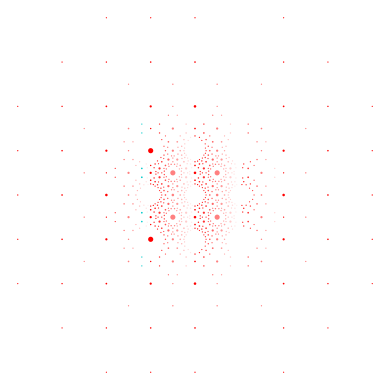

In [8]:
gauss = draw_fieldelts_one_embed(Fgauss, 20)
gauss.show(axes=False)

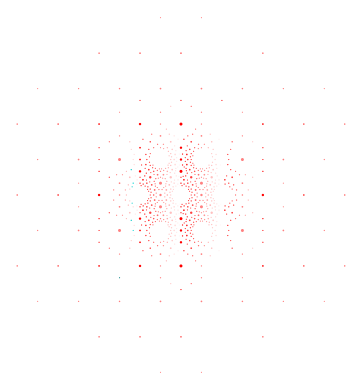

In [9]:
eis = draw_fieldelts_one_embed(Feis, 20)
eis.show(axes=False)

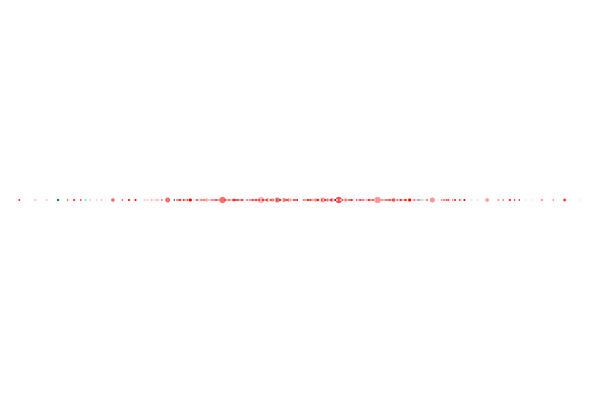

In [10]:
fig = draw_fieldelts_one_embed(Frq, 20)
fig.set_axes_range(xmin=-5, xmax=5, ymin=-1, ymax=1) # it complains that ymin, ymax are both 0 otherwise.
fig.show(axes=False, fig_tight=False)                # similarly, with fig_tight it has no height.

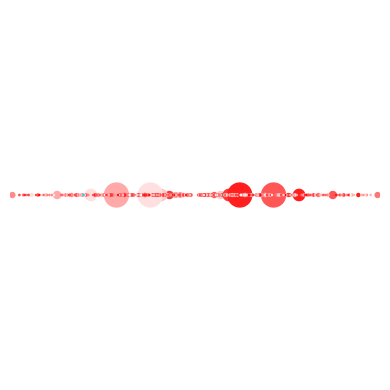

In [11]:
fig = draw_fieldelts_one_embed(Fd3, 20)
fig.set_axes_range(xmin=-3, xmax=3, ymin=-3, ymax=3)
fig.show(axes=False)

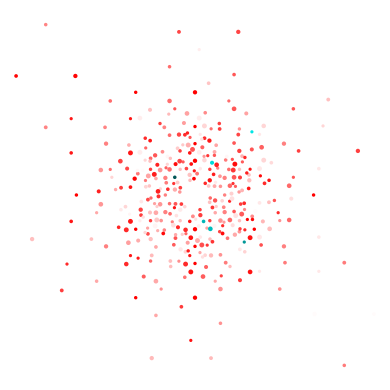

In [12]:
fig = draw_fieldelts_one_embed(Fd4, 20)
fig.set_axes_range(xmin=-3, xmax=3, ymin=-3, ymax=3)
fig.show(axes=False)

These aren't particularly successful, but it might be reasonable to tweak these.

## Choose linear combination of embeddings ##

Choose a linear combination of embeddings. (Below, we choose a random linear combination with coefficients in $(0, 1)$). For each point $z \in O_K$, we plot $\sum_i c_i \sigma_i(z)$. This doesn't use color. Disks are sized to be inversely proportional to the square of the global height of $z$. We plot all points in the ring of integers

In [13]:
import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt

cm = mpl.colormaps.get('inferno')

In [14]:
def random_list(num):
    ret = []
    for idx in range(num):
        ret.append(random())
    return ret

def linear_comb_embed_viz(K, size=10, decexp=2):
    pts = list(K.elements_of_bounded_height(bound=size))
    all_embeds = K.embeddings(CC)
    
    xs = []
    ys = []
    ss = []
    
    coeffs = random_list(len(all_embeds))
    for pt in pts:
        z = 0
        for idx, embed in enumerate(all_embeds):
            z += coeffs[idx] * embed(pt)
        x = real(z)
        y = imag(z)
        xs.append(x)
        ys.append(y)
        ss.append(float(20. / (pt.global_height()^decexp + 1)))
        
    fig = plt.figure(figsize=[8, 8])
    ax = fig.subplots(1, 1)
    ax.set_frame_on(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.scatter(xs, ys, c='k', s=ss)
        
    return fig

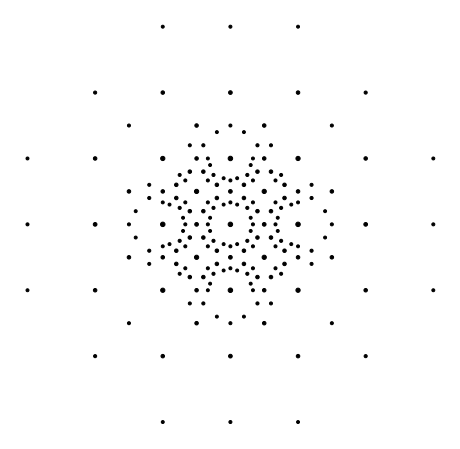

In [15]:
fig = linear_comb_embed_viz(Fgauss, 10)

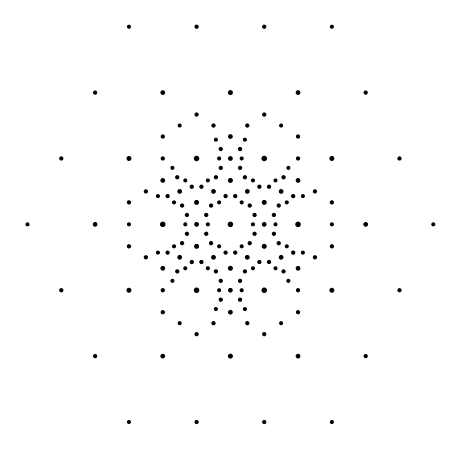

In [16]:
fig = linear_comb_embed_viz(Feis, 10)

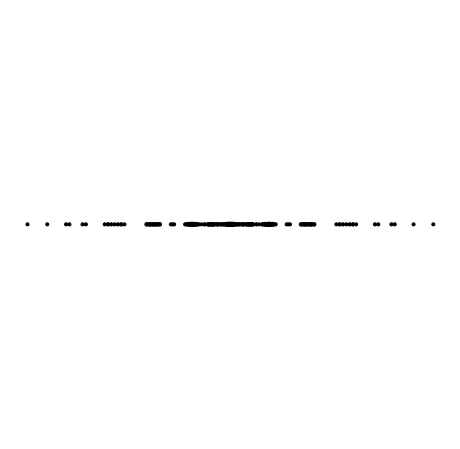

In [17]:
fig = linear_comb_embed_viz(Frq, 10)

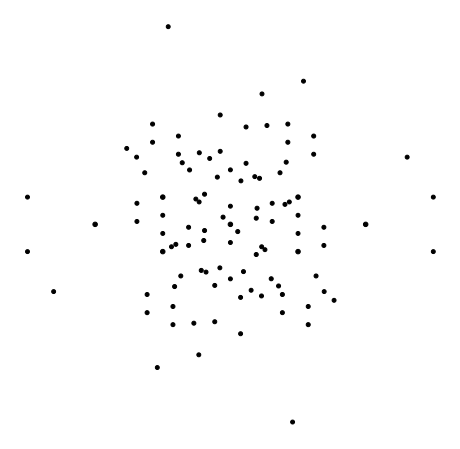

In [18]:
fig = linear_comb_embed_viz(Fd4, 10)

We print two versions of the same number field to note that there is a choice of randomness here. This is similar to choosing a random projection of the "simple" points on the lattice to the complex numbers.

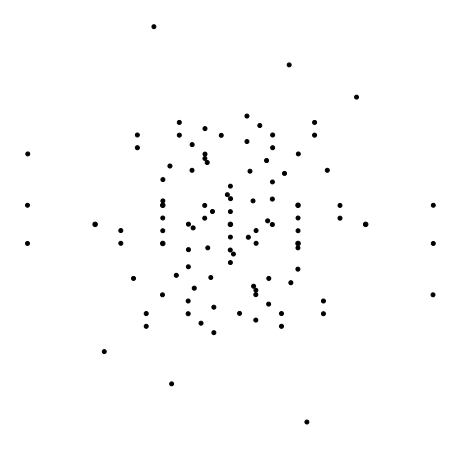

In [19]:
fig = linear_comb_embed_viz(Fd4, 10)

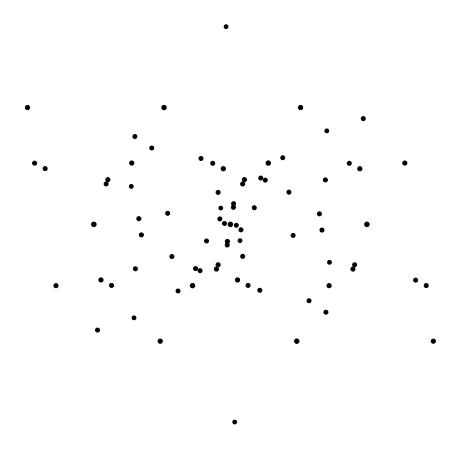

In [20]:
Kd8.<a> = NumberField(x^8 + 7*x^3 - 2*x + 3)
fig = linear_comb_embed_viz(Kd8, 75)

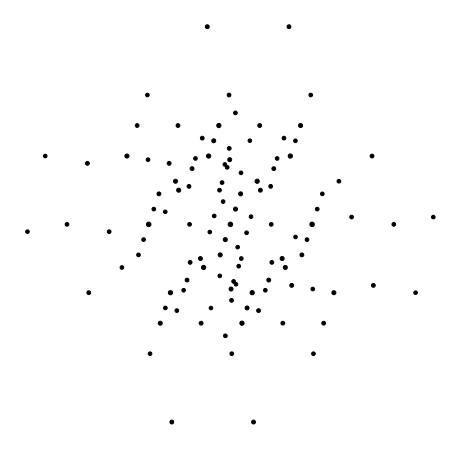

In [21]:
Kd3_2.<a> = NumberField(x^3 - 2*x + 3)
fig = linear_comb_embed_viz(Kd3_2, 10)

## Ring of integers ##

For the remaining visualizations, we restrict our attention to the lattice of the ring of integers.

First, we produce all linear combinations with coefficients bounded by $B$ of a basis for the ring of integers. We currently choose the basis given by sage --- more generally, we would use the basis from the LMFDB. We plot each embedding of each point, and we color the embedded point via a colormap (below, we use `matplotlib`'s *inferno* colormap) based on the index of the embedding in the list of embeddings.

In [22]:
def make_linear_combinations(basis, coefflimit=5):
    for prod in itertools.product(
                range(-coefflimit, coefflimit+1),
                repeat=len(basis)
            ):
        yield sum((coeff*basis_elem for coeff, basis_elem in zip(prod, basis)))


def makepts(elems, embedding):
    pts = []
    for elem in elems:
        z = embedding(elem)
        x = real(z)
        y = imag(z)
        s = 100./abs(elem.norm())
        pts.append((x, y, s))
    return pts

In [23]:
def ring_of_int_viz(K, climit=5):
    Ri = K.ring_of_integers()
    basis = Ri.basis()
    embeds = K.embeddings(CC)
    
    combos = list(make_linear_combinations(basis, climit))
    
    fig = plt.figure(figsize=[8, 8])
    ax = fig.subplots(1, 1)
    
    for idx, embed in enumerate(embeds):
        pts = makepts(combos, embed)
        xs, ys, ss = list(zip(*pts))
        color = cm(idx * 1.0 / len(embeds))
        ax.scatter(xs, ys, s=ss, color=color)
        
    ax.set_frame_on(False)
    ax.set_xticks([])
    ax.set_yticks([])
    return fig

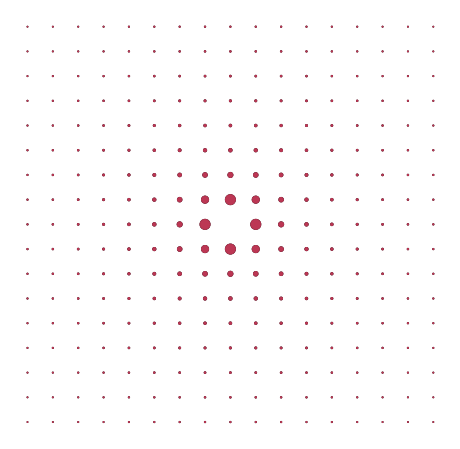

In [24]:
fig = ring_of_int_viz(Fgauss, 8)

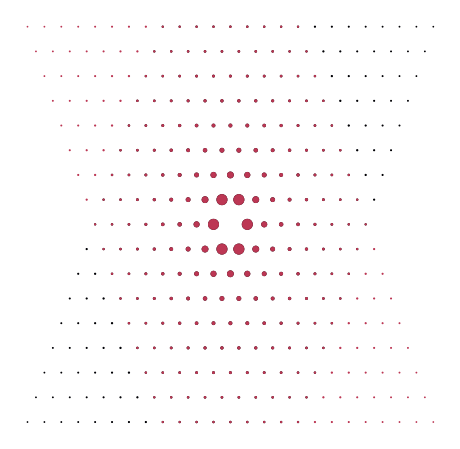

In [25]:
fig = ring_of_int_viz(Feis, 8)

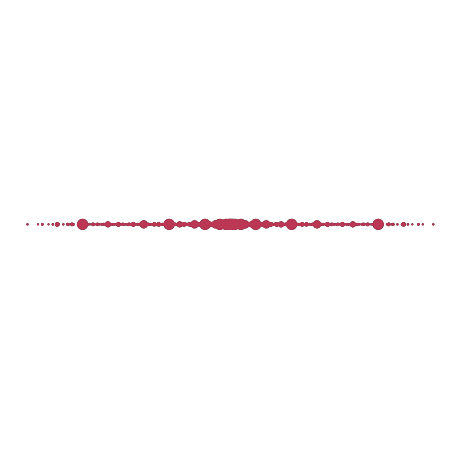

In [26]:
fig = ring_of_int_viz(Frq, 8)

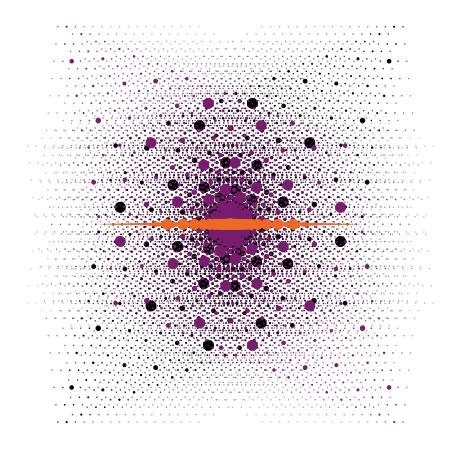

In [27]:
fig = ring_of_int_viz(Fd3, 8)

(-5.0, 5.0)

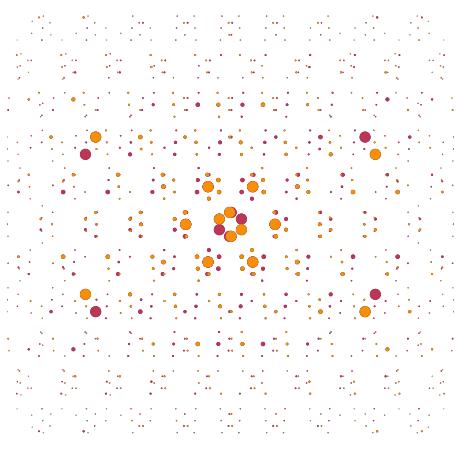

In [28]:
fig = ring_of_int_viz(Fd4, 5)
ax = fig.axes[0]
ax.set_xlim(left=-5, right=5)
ax.set_ylim(bottom=-5, top=5)

(-10.0, 10.0)

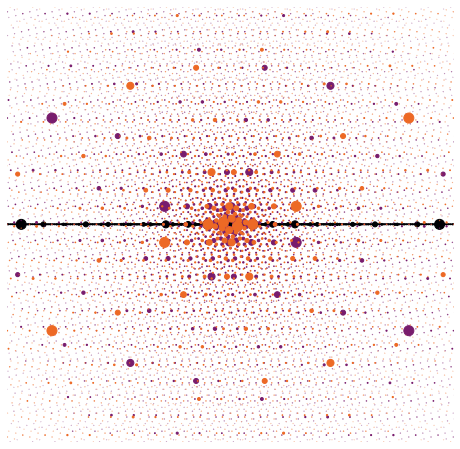

In [29]:
fig1 = ring_of_int_viz(Kd3_2, 10)
ax = fig1.axes[0]
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

(-1.0, 1.0)

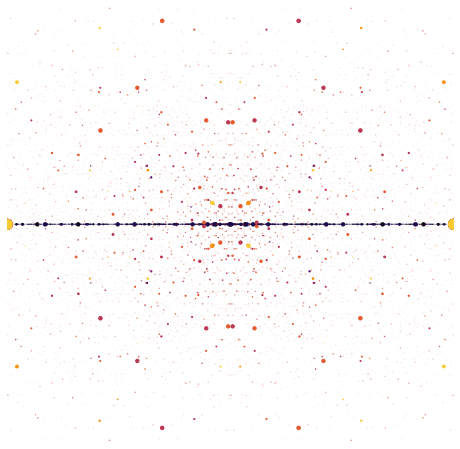

In [30]:
fig1 = ring_of_int_viz(Kd8, 1)
ax = fig1.axes[0]
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

This doesn't require computing the class number or class group, but computing linear combinations has very rapid combinatorial explosion.

A possibility that would be easy to implement, but which I haven't done, would be to randomly sample the space of linear combinations with smallish coefficients and plot that collection of embeddings.

## Small combinations of basis elements ##

Let us choose just enough linear combinations of basis vectors to  get a certain number of points. Here, we want at least 50 points. To get there, we first add every element in the basis. Then, until we have at least $50$ points, we systematically add each element of the basis to obtained points.

As before, we scale points inversely based on their height. We plot each embedding, and color points according to which embedding they're in.

In [31]:
def just_enough_linear_combinations(basis, goal=50):
    ret = {0}
    while len(ret) < goal:
        newitems = set()
        for basis_element in basis:
            for item in ret:
                newitem = item + basis_element
                newitems.add(item + basis_element)
        ret = ret.union(newitems)
    return ret

In [32]:
def small_basis_viz(K, goal=50, decexp=2):
    Ri = K.ring_of_integers()
    
    pts = just_enough_linear_combinations(Ri.basis(), goal)

    all_embeds = K.embeddings(CC)
    
    xs = []
    ys = []
    ss = []
    cs = []
    
    if K.degree() < 8:  # don't compute heights for large degrees
        for pt in pts:
            s = float(10. / max(pt.global_height(), 1))
            ss.append(s)
    else:
        for pt in pts:
            ss.append(1)
    
    for embed_idx, embed in enumerate(all_embeds):
        for pt in pts:
            z = embed(pt)
            x = real(z)
            y = imag(z)
            c = cm(embed_idx * 1.0 / len(all_embeds))
            xs.append(x)
            ys.append(y)
            cs.append(c)
            
    ss = ss * len(all_embeds)
        
    fig = plt.figure(figsize=[8, 8])
    ax = fig.subplots(1, 1)
    ax.scatter(xs, ys, c=cs, s=ss, alpha=1.0)
    ax.set_frame_on(False)
    ax.set_xticks([])
    ax.set_yticks([])   
    return fig

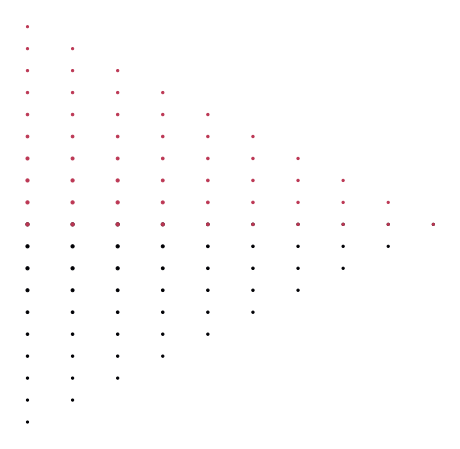

In [33]:
fig = small_basis_viz(Fgauss)

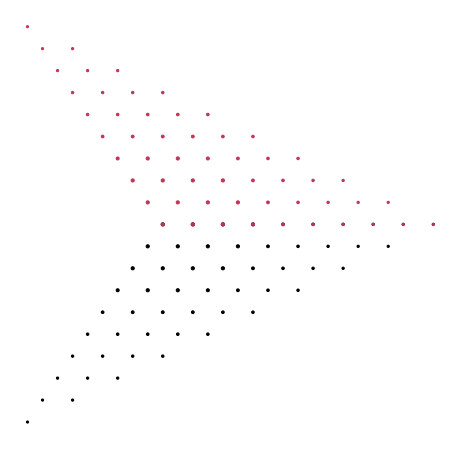

In [34]:
fig = small_basis_viz(Feis)

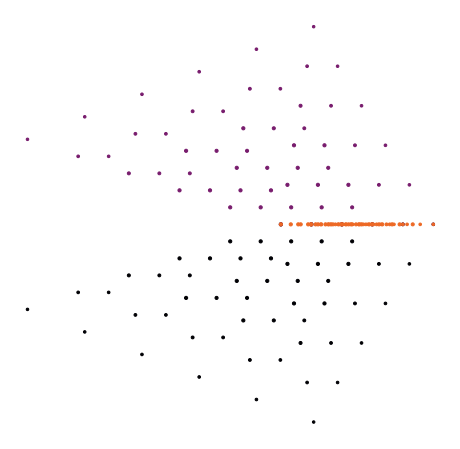

In [35]:
fig = small_basis_viz(Fd3)

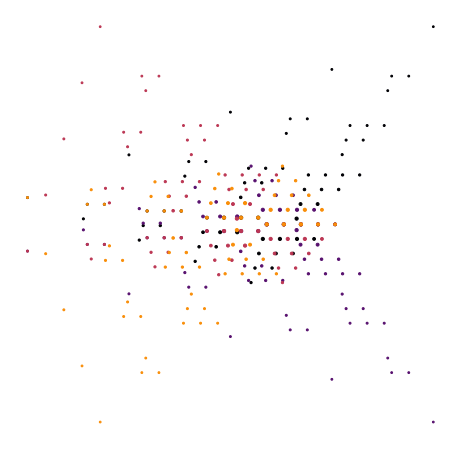

In [36]:
fig = small_basis_viz(Fd4)

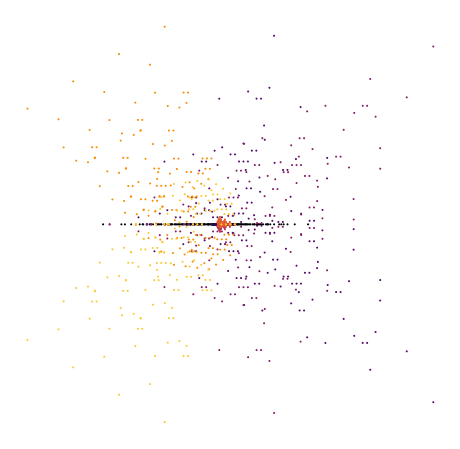

In [37]:
fig = small_basis_viz(Kd8)

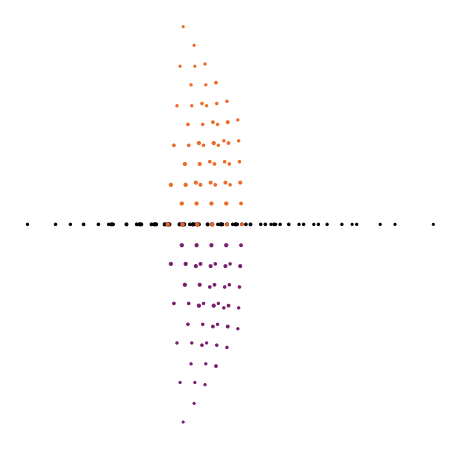

In [38]:
fig = small_basis_viz(Kd3_2)

This visualization works for high degree numberfields as well.

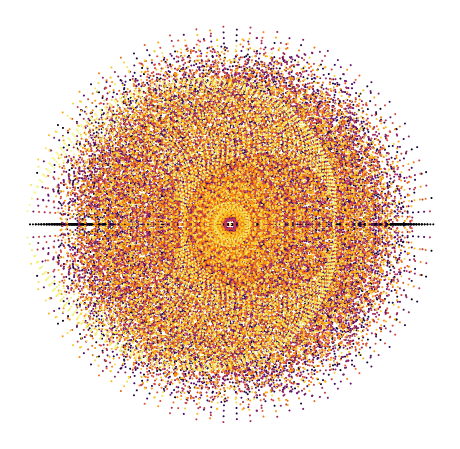

In [39]:
K.<a> = NumberField(x^47 + 2)
fig = small_basis_viz(K)

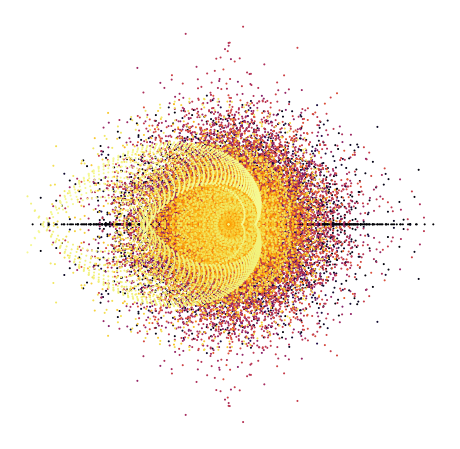

In [40]:
K.<a> = NumberField(x^47 + 5*x^4 + 2)
fig = small_basis_viz(K)

## Plotting Embeddings of the Integral Basis ##

Finally, we investigate plots of precisely the integral basis.

In [41]:
def integral_basis_embedding_viz(K, size=10):
    Ri = K.ring_of_integers()
    basis = Ri.basis()
    embeds = K.embeddings(CC)
    
    pts = []
    cs = []
    for basis_element in basis:
        for idx, embedding in enumerate(embeds):
            z = embedding(basis_element)
            pts.append((real(z), imag(z)))
            cs.append(cm(idx * 1.0 / len(embeds)))
    
    xs, ys = list(zip(*pts))
    
    fig = plt.figure(figsize=[8, 8])
    ax = fig.subplots(1, 1)
    ax.scatter(xs, ys, c=cs, s=size)
    ax.set_frame_on(False)
    ax.set_xticks([])
    ax.set_yticks([])
    return fig

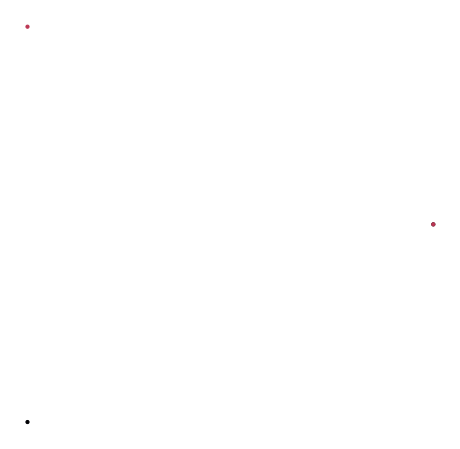

In [42]:
fig = integral_basis_embedding_viz(Fgauss)

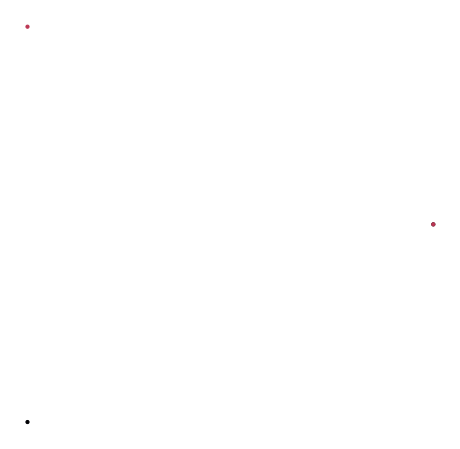

In [43]:
fig = integral_basis_embedding_viz(Feis)

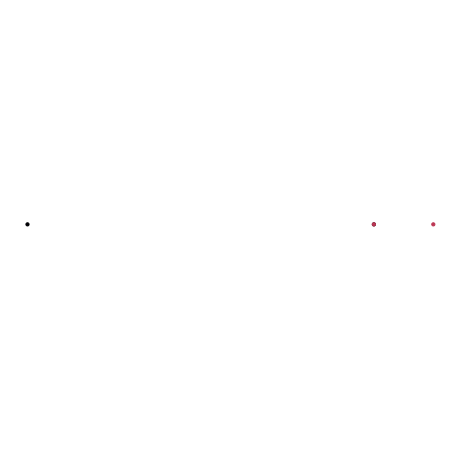

In [44]:
fig = integral_basis_embedding_viz(Frq)

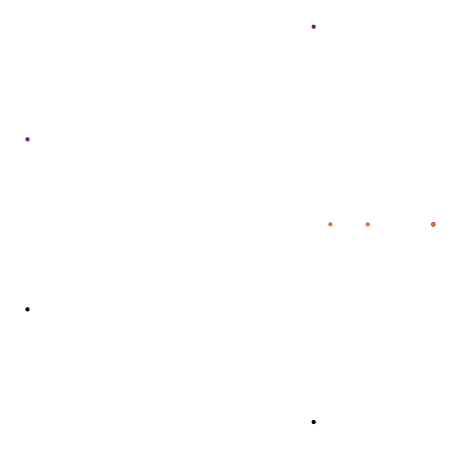

In [45]:
fig = integral_basis_embedding_viz(Fd3)

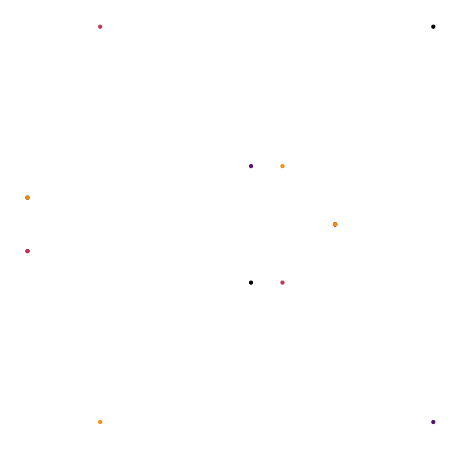

In [46]:
fig = integral_basis_embedding_viz(Fd4)

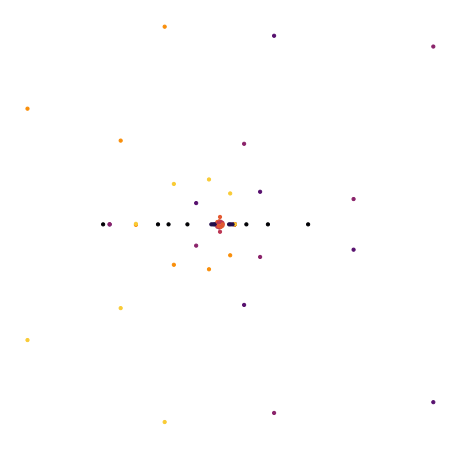

In [47]:
fig = integral_basis_embedding_viz(Kd8)

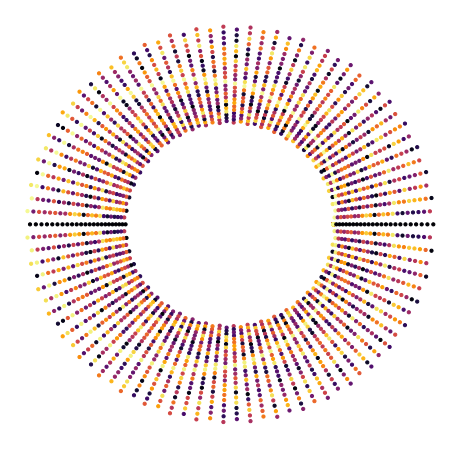

In [48]:
K.<a> = NumberField(x^47 + 2)
fig = integral_basis_embedding_viz(K)

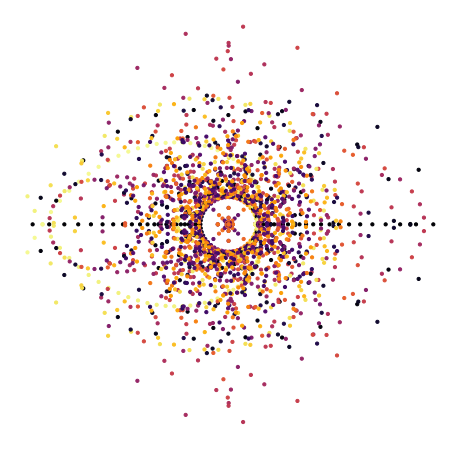

In [49]:
K.<a> = NumberField(x^47 + 5*x^4 + 2)
fig = integral_basis_embedding_viz(K)

These are more interesting as the degree gets large. This image is included in the core of the previous type of plot, but the previous plots typically include more points.

Let's make the same plot, but coloring each *point* in a different color instead of each *embedding* a different color. That is, if $\sigma_i$ and $\sigma_j$ are two embeddings, we color $\sigma_i(z_1)$ the same as $\sigma_j(z_2)$, but both differently than $\sigma_i(z_2)$ for a different point $z_2$.

In [50]:
def integral_basis_embedding_viz_opp(K, size=10):
    Ri = K.ring_of_integers()
    basis = Ri.basis()
    embeds = K.embeddings(CC)
    
    pts = []
    cs = []
    for embedding in embeds:
        for idx, basis_element in enumerate(basis):
            z = embedding(basis_element)
            pts.append((real(z), imag(z)))
            cs.append(cm(idx * 1.0 / len(basis)))
    
    xs, ys = list(zip(*pts))
    
    fig = plt.figure(figsize=[8, 8])
    ax = fig.subplots(1, 1)
    ax.scatter(xs, ys, c=cs, s=size)
    ax.set_frame_on(False)
    ax.set_xticks([])
    ax.set_yticks([])
    return fig

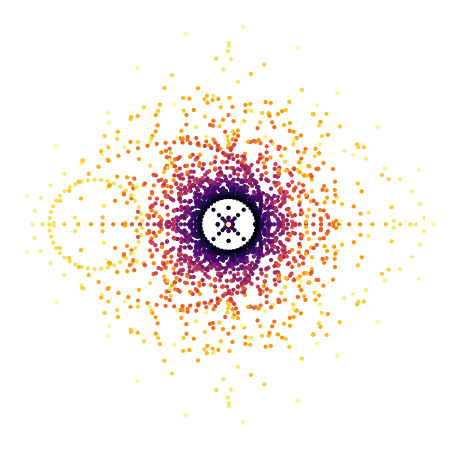

In [51]:
K.<a> = NumberField(x^47 + 5*x^4 + 2)
fig = integral_basis_embedding_viz_opp(K)

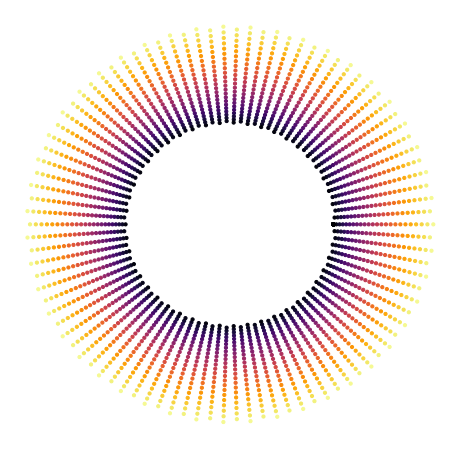

In [52]:
K.<a> = NumberField(x^47 + 2)
fig = integral_basis_embedding_viz_opp(K)

Finally, we make the previous style of plot, involving a minimum number of points formed from basis elements, but in this color system: we color each *point* the same point across different embeddings, and different points get different colors.

In [53]:
def small_basis_viz_opp(K, goal=50, decexp=2):
    Ri = K.ring_of_integers()
    
    pts = just_enough_linear_combinations(Ri.basis(), goal)

    all_embeds = K.embeddings(CC)
    
    xs = []
    ys = []
    ss = []
    cs = []
    
    if K.degree() < 8:  # don't compute heights for large degrees
        for pt in pts:
            s = float(10. / max(pt.global_height(), 1))
            ss.append(s)
    else:
        for pt in pts:
            ss.append(1)
    
    for embed in all_embeds:
        for idx, pt in enumerate(pts):
            z = embed(pt)
            x = real(z)
            y = imag(z)
            c = cm(idx * 1.0 / len(pts))
            xs.append(x)
            ys.append(y)
            cs.append(c)
            
    ss = ss * len(all_embeds)
        
    fig = plt.figure(figsize=[8, 8])
    ax = fig.subplots(1, 1)
    ax.scatter(xs, ys, c=cs, s=ss, alpha=1.0)
    ax.set_frame_on(False)
    ax.set_xticks([])
    ax.set_yticks([])   
    return fig

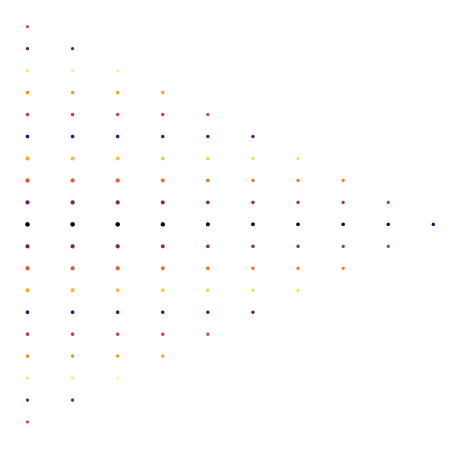

In [54]:
fig = small_basis_viz_opp(Fgauss)

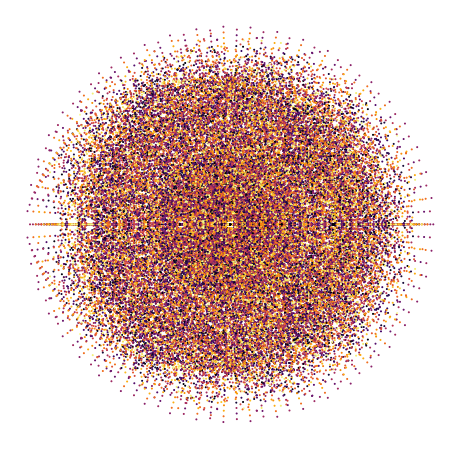

In [55]:
K.<a> = NumberField(x^47 + 2)
fig = small_basis_viz_opp(K)

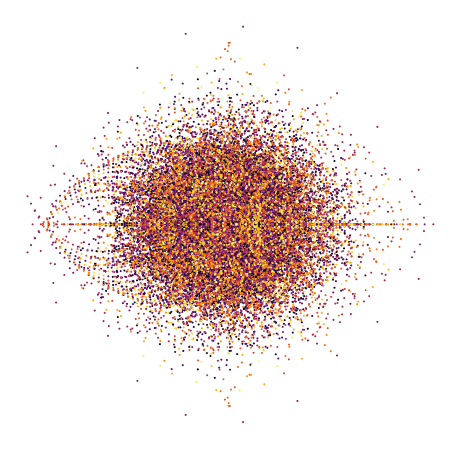

In [56]:
K.<a> = NumberField(x^47 + 5*x^4 + 2)
fig = small_basis_viz_opp(K)

I think the reason this coloring is less successful here as opposed to with just the basis is that there is no clear ordering of points in the linear combinations. Thus the ordering of colors is a bit mysterious.

To end, I'll note that none of these visualizations work very well for totally real fields. This is something that requires an additional idea.